<a href="https://colab.research.google.com/github/Goldi-Ai/PRODIGY_DS_02/blob/main/Task02_Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚢 Titanic Data Cleaning & Exploratory Data Analysis (Task-02)

## 📌 Project Overview
This notebook is part of the **Prodigy InfoTech Data Science Internship – Task 02**.  
The objective of this task is to perform **Data Cleaning & Exploratory Data Analysis (EDA)** on the Titanic dataset.

### 🎯 Goals of this Project:
- Handle **missing values** in the dataset  
- Perform **feature engineering** (create new meaningful features)  
- Visualize and analyze **relationships & trends** among variables  
- Generate **insights about survival patterns**  

### 📂 Dataset
The Titanic dataset consists of passenger details such as:
- Name, Age, Gender, Passenger Class, Siblings/Spouses aboard, Parents/Children aboard, Embarkation Port, etc.
- Target variable → **Survived (0 = Not Survived, 1 = Survived)**

By analyzing this dataset, we aim to discover **factors that influenced passenger survival** during the Titanic disaster.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../Dataset/train.csv")

print("✅ Dataset Loaded Successfully")
print("Shape:", df.shape)
print(df.head())

✅ Dataset Loaded Successfully
Shape: (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0

In [4]:
# Dataset Overview
print("\n📌 Basic Info:")
print(df.info())
print("\n📌 Summary Statistics:")
print(df.describe(include="all"))

# Check missing values
print("\n📌 Missing Values:\n", df.isnull().sum())


📌 Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

📌 Summary Statistics:
        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN          

In [5]:
# Data Cleaning
# Fill Age with median
df["Age"].fillna(df["Age"].median(), inplace=True)

# Fill Embarked with mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Drop Cabin (too many missing values)
df.drop(columns=["Cabin"], inplace=True)

# Feature Engineering
df["FamilySize"] = df["SibSp"] + df["Parch"]
df["IsAlone"] = (df["FamilySize"] == 0).astype(int)

/tmp/ipython-input-2900602070.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/tmp/ipython-input-2900602070.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

/tmp/ipython-input-4170349531.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=df, palette="pastel")


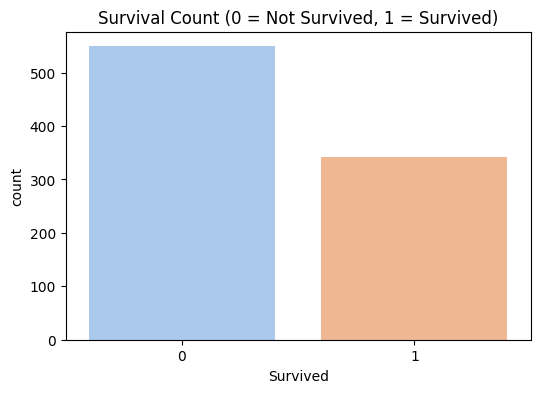

In [6]:
# 4. Exploratory Data Analysis (EDA)
# (A) Target Variable Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=df, palette="pastel")
plt.title("Survival Count (0 = Not Survived, 1 = Survived)")
plt.show()

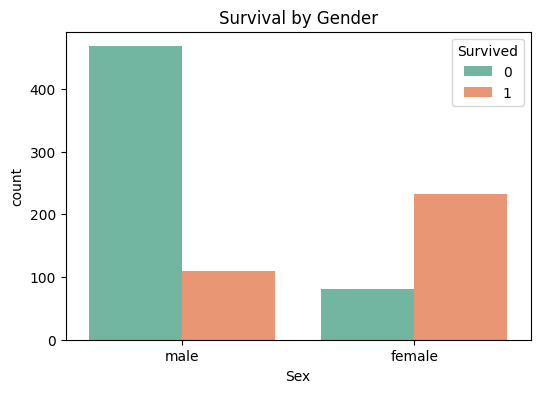

In [7]:
# (B) Survival by Gender
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", hue="Survived", data=df, palette="Set2")
plt.title("Survival by Gender")
plt.show()

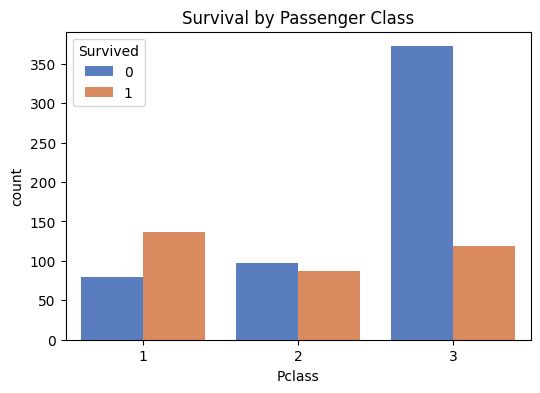

In [8]:
# (C) Survival by Passenger Class
plt.figure(figsize=(6,4))
sns.countplot(x="Pclass", hue="Survived", data=df, palette="muted")
plt.title("Survival by Passenger Class")
plt.show()

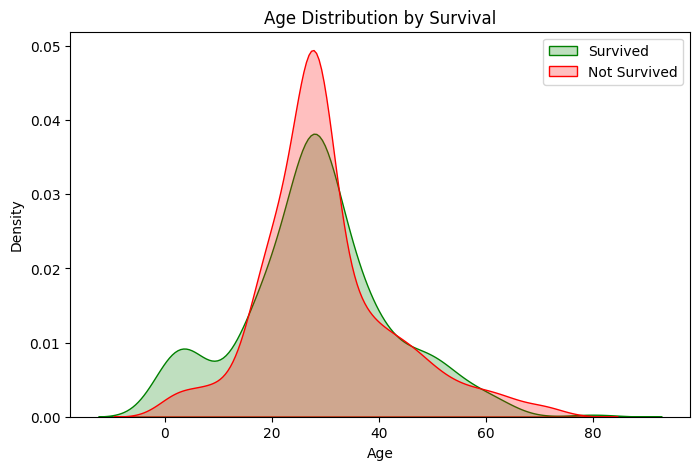

In [9]:
# (D) Age Distribution by Survival
plt.figure(figsize=(8,5))
sns.kdeplot(df[df["Survived"]==1]["Age"], fill=True, label="Survived", color="green")
sns.kdeplot(df[df["Survived"]==0]["Age"], fill=True, label="Not Survived", color="red")
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.legend()
plt.show()

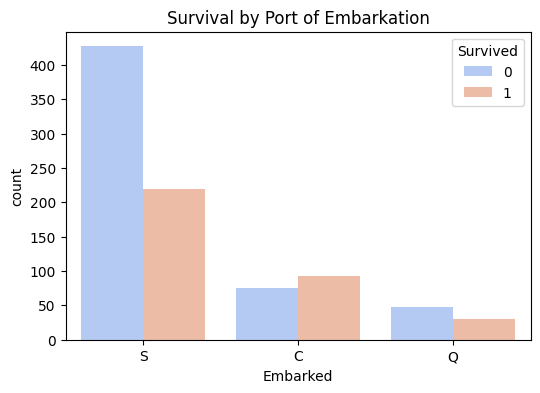

In [10]:
# (E) Survival by Embarkation Port
plt.figure(figsize=(6,4))
sns.countplot(x="Embarked", hue="Survived", data=df, palette="coolwarm")
plt.title("Survival by Port of Embarkation")
plt.show()

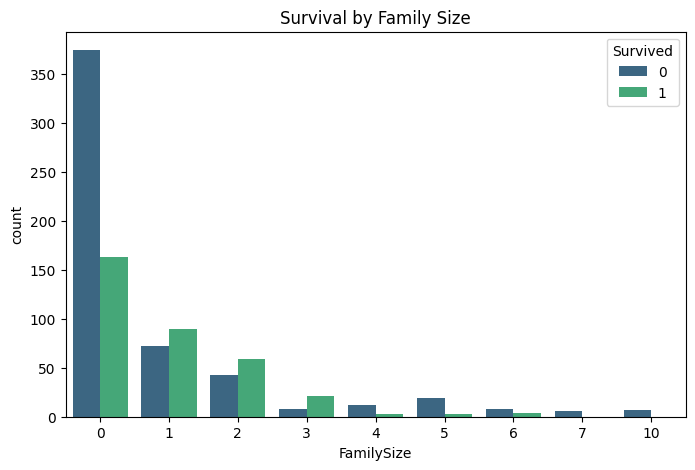

In [11]:
# (F) Survival by Family Size
plt.figure(figsize=(8,5))
sns.countplot(x="FamilySize", hue="Survived", data=df, palette="viridis")
plt.title("Survival by Family Size")
plt.show()

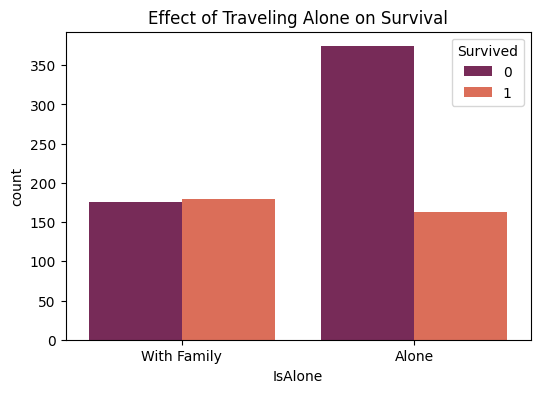

In [12]:
# (G) Is Alone vs Survival
plt.figure(figsize=(6,4))
sns.countplot(x="IsAlone", hue="Survived", data=df, palette="rocket")
plt.title("Effect of Traveling Alone on Survival")
plt.xticks([0,1], ["With Family", "Alone"])
plt.show()

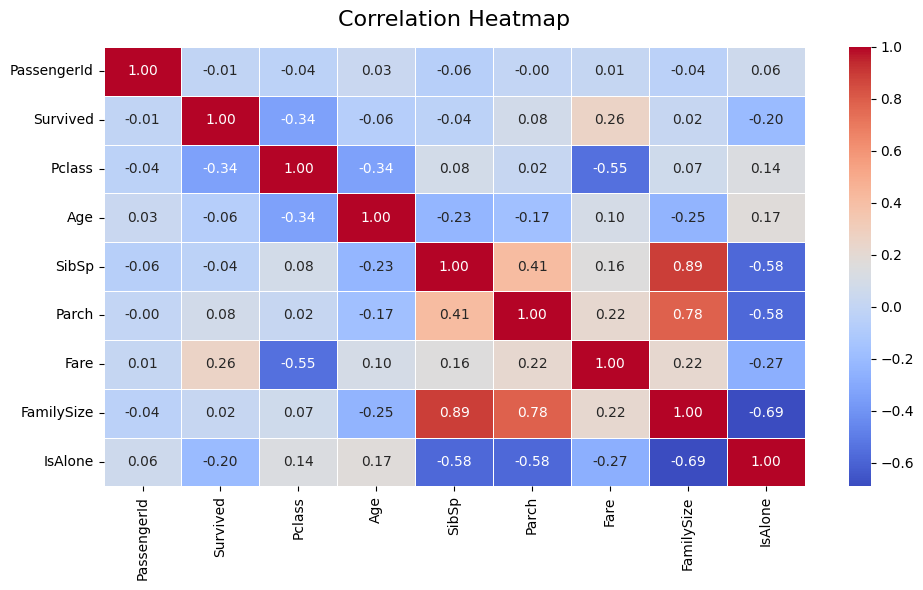

In [14]:
# (H) Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)  # ensures only numeric columns are used (for pandas >=1.5)

sns.heatmap(
    corr,
    annot=True,        # show correlation values
    cmap="coolwarm",   # color palette
    fmt=".2f",         # decimal precision
    linewidths=0.5,    # gridlines
    cbar=True          # show color bar
)

plt.title("Correlation Heatmap", fontsize=16, pad=15)
plt.tight_layout()
plt.show()

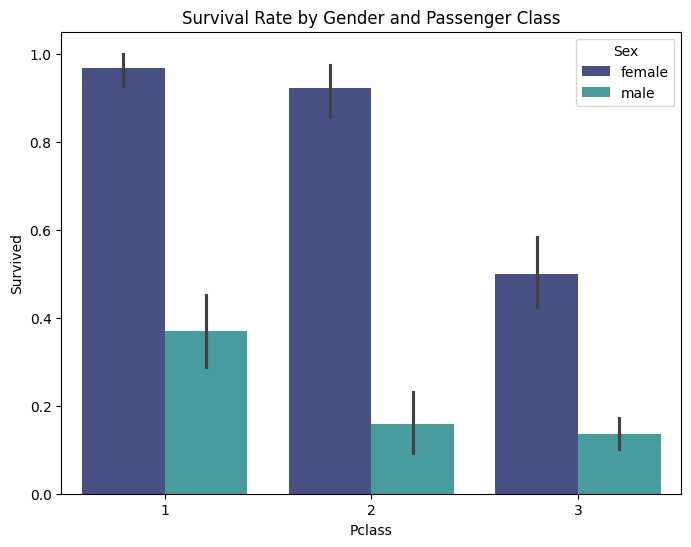

In [15]:
# (I) Survival Rate by Gender & Pclass (Combined Analysis)
plt.figure(figsize=(8,6))
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=df, palette="mako")
plt.title("Survival Rate by Gender and Passenger Class")
plt.show()

# ✅ Conclusion & Insights

From the **Exploratory Data Analysis (EDA)** on the Titanic dataset, we discovered several key insights:

- 🎯 **Gender:** Females had a significantly higher survival rate than males  
- 🎯 **Passenger Class:** First-class passengers had better chances of survival compared to second and third class  
- 🎯 **Age:** Younger passengers were more likely to survive  
- 🎯 **Family Factor:** Passengers traveling with small families had better survival chances than those alone or with large families  
- 🎯 **Embarkation Port:** Passengers boarding from port 'C' had relatively higher survival rates  

### 📊 Key Takeaway:
This analysis highlights how **socio-economic factors (class), demographics (age, gender), and social ties (family size)** played a crucial role in survival chances on the Titanic.

---

## 🙌 Internship Note
This project was completed as part of **Prodigy InfoTech Data Science Internship – Task 02 (Data Cleaning & EDA)**.  
The task helped me strengthen my skills in:
- Data Preprocessing & Cleaning
- Exploratory Data Analysis
- Data Visualization with Seaborn & Matplotlib
- Gaining actionable insights from raw datasets
